In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-streaming-data/netflix_titles.csv


In [4]:
df = pd.read_csv('/kaggle/input/netflix-streaming-data/netflix_titles.csv')
print(df)

     show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa 

In [7]:
country_gpy = df.groupby('country')['type'].sum().sort_values()
print(country_gpy)

country
, France, Algeria                                                      Movie
Spain, Portugal                                                        Movie
Spain, Mexico, France                                                  Movie
Spain, Italy, Argentina                                                Movie
Spain, France, Uruguay                                                 Movie
                                                 ...                        
South Korea                TV ShowTV ShowTV ShowTV ShowTV ShowMovieTV Sho...
Spain                      TV ShowTV ShowTV ShowTV ShowTV ShowTV ShowMovi...
Israel                     TV ShowTV ShowTV ShowTV ShowTV ShowTV ShowMovi...
Belgium                    TV ShowTV ShowTV ShowTV ShowTV ShowTV ShowTV S...
Russia                     TV ShowTV ShowTV ShowTV ShowTV ShowTV ShowTV S...
Name: type, Length: 748, dtype: object


In [9]:
total_type = df['type'].value_counts()
print(total_type)

type
Movie      6131
TV Show    2676
Name: count, dtype: int64


In [10]:
high_country = df['country'].value_counts().head(1)
print(high_country)

country
United States    2818
Name: count, dtype: int64


In [22]:
director_gry= df['director'].value_counts().head(5)
print(director_gry)

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Name: count, dtype: int64


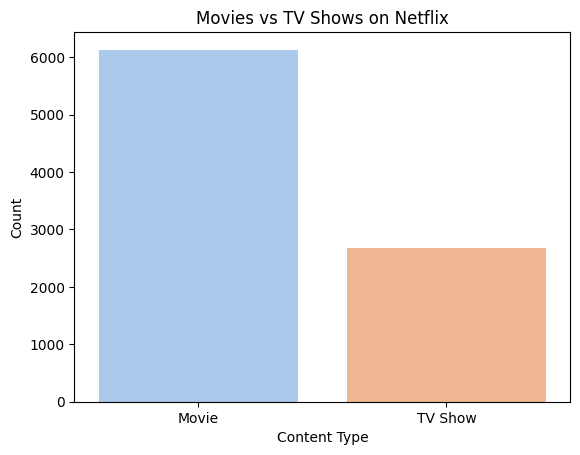

In [24]:
sns.countplot(x='type', data=df, palette='pastel')
plt.title('Movies vs TV Shows on Netflix')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()

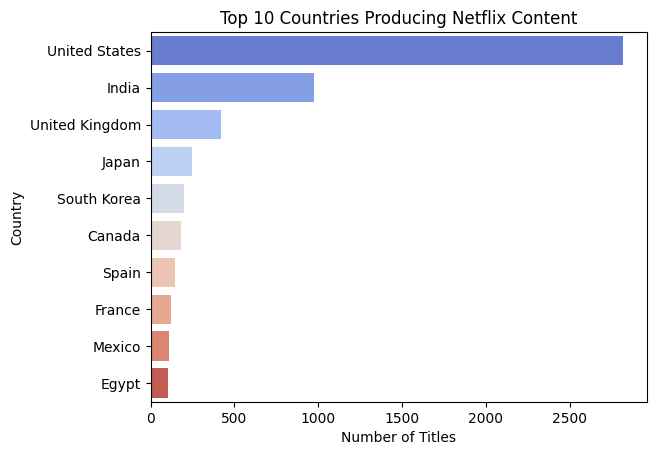

In [29]:
top_countries = df['country'].value_counts().head(10).reset_index()
top_countries.columns = ['country', 'count']

sns.barplot(y='country', x='count', data=top_countries, palette='coolwarm')
plt.title('Top 10 Countries Producing Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


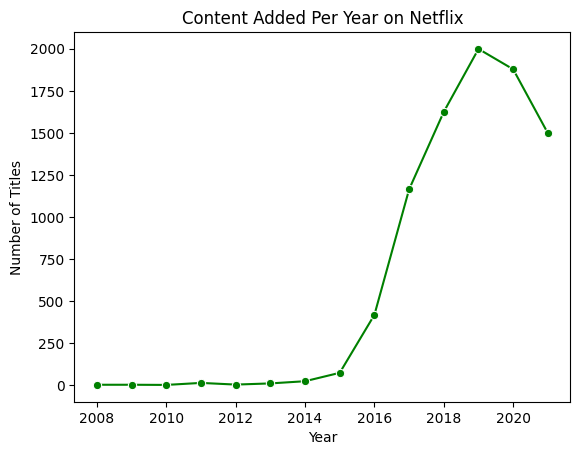

In [30]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

yearly = df['year_added'].value_counts().sort_index()

sns.lineplot(x=yearly.index, y=yearly.values, marker='o', color='green')
plt.title('Content Added Per Year on Netflix')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()


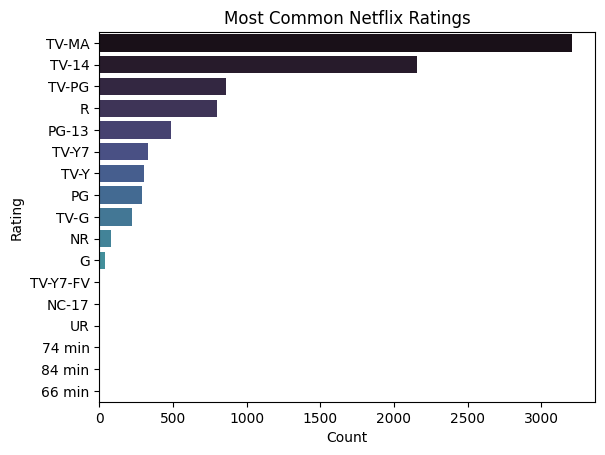

In [31]:
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, palette='mako')
plt.title('Most Common Netflix Ratings')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


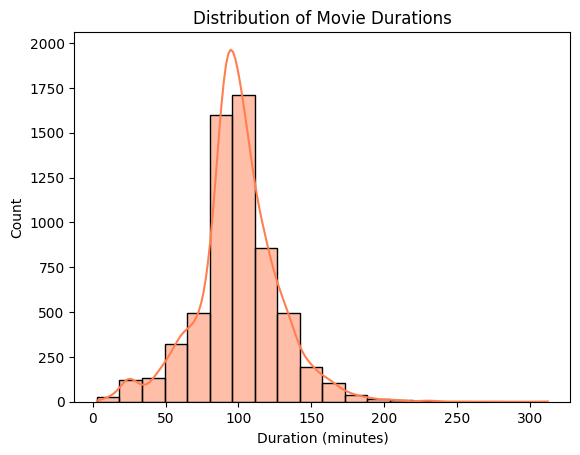

In [32]:
# Filter only movies
movies = df[df['type'] == 'Movie'].copy()
# Extract numeric duration (remove "min")
movies['duration_mins'] = movies['duration'].str.replace(' min', '').astype(float)

sns.histplot(movies['duration_mins'], bins=20, kde=True, color='coral')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


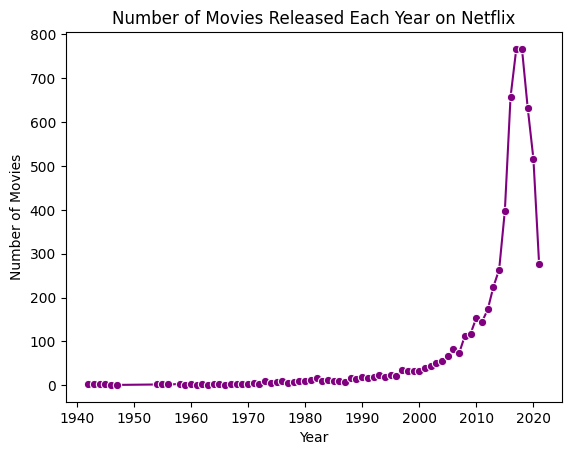

In [34]:
movies_per_year = movies['release_year'].value_counts().sort_values()
sns.lineplot(x=movies_per_year.index, y=movies_per_year.values, marker='o', color='purple')
plt.title('Number of Movies Released Each Year on Netflix')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()